In [45]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Load kết quả baseline

In [46]:
df_results = pd.read_csv("../results/tables/baseline_results.csv")
figures_dir = "../results/figures/baseline"

# Vẽ từng biểu đồ

1️⃣ So sánh trực tiếp giữa Baseline và GridSearchCV trên 4 tiêu chí

C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_4628\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_4628\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_4628\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_4628\2839284419.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.

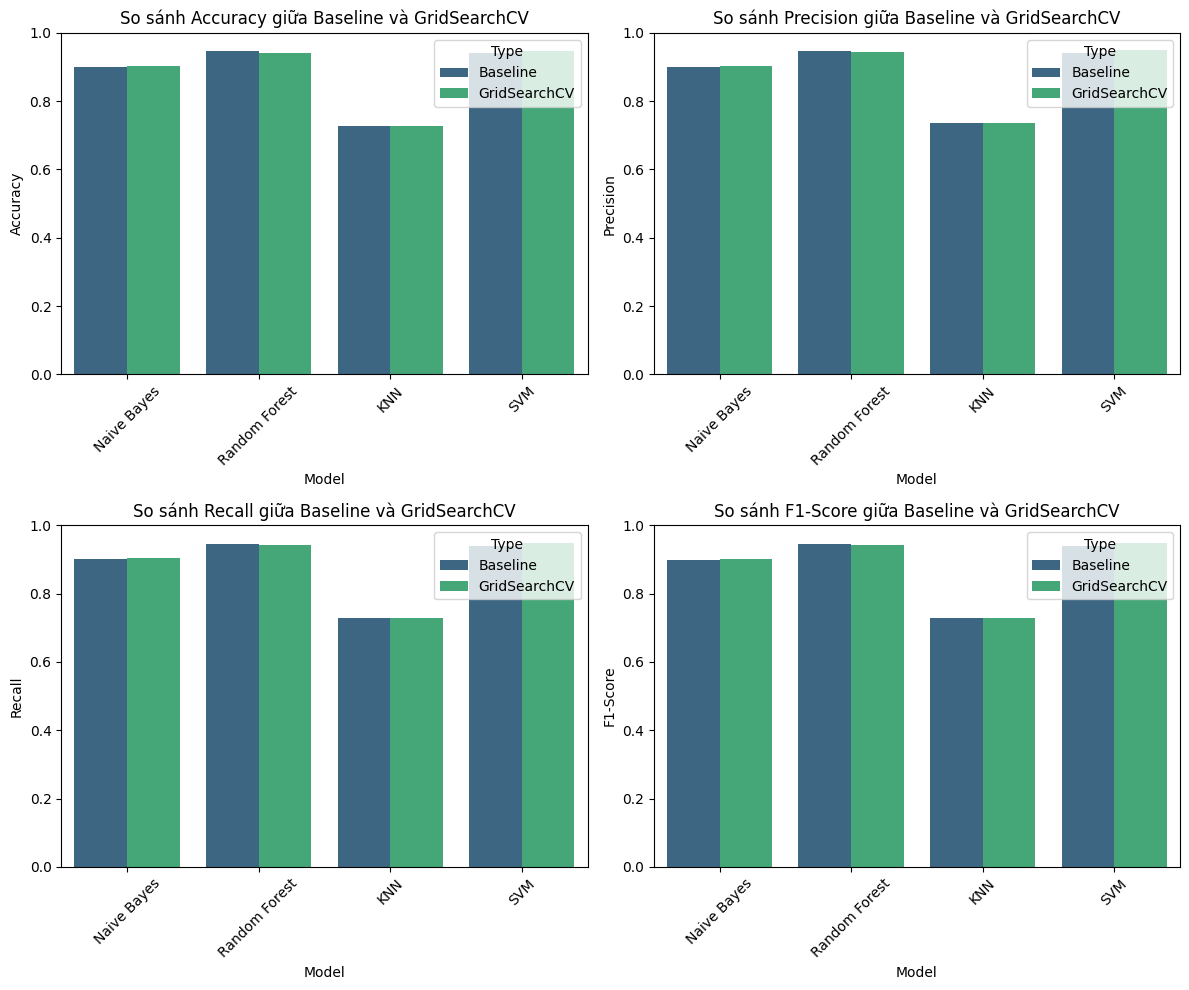

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    sns.barplot(data=df_results, x="Model", y=metric, hue="Type", ax=ax, palette="viridis")
    ax.set_title(f"So sánh {metric} giữa Baseline và GridSearchCV")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylim(0, 1)

fig.tight_layout()
fig.savefig(os.path.join(figures_dir, "comparison_metrics.png"))
plt.show()

In [48]:
print(df_pivot.head())

              Accuracy               F1-Score              Precision  \
Type          Baseline GridSearchCV  Baseline GridSearchCV  Baseline   
Model                                                                  
KNN             0.7285       0.7285  0.729579     0.729579  0.737244   
Naive Bayes     0.9005       0.9035  0.899096     0.902173  0.899447   
Random Forest   0.9460       0.9420  0.946024     0.941974  0.946284   
SVM             0.9400       0.9470  0.940310     0.947365  0.940909   

                             Recall               
Type          GridSearchCV Baseline GridSearchCV  
Model                                             
KNN               0.737244   0.7285       0.7285  
Naive Bayes       0.902725   0.9005       0.9035  
Random Forest     0.943023   0.9460       0.9420  
SVM               0.948433   0.9400       0.9470  


In [49]:
# Chuyển dữ liệu về dạng pivot table để dễ tính toán
df_pivot = df_results.pivot_table(index="Model", columns="Type", values=["Accuracy", "Precision", "Recall", "F1-Score"])

# Tính Improvement (%) đơn giản hơn
df_improvement = (df_pivot.xs("GridSearchCV", axis=1, level=1) - df_pivot.xs("Baseline", axis=1, level=1)) * 100

# Reset index để thuận tiện vẽ biểu đồ
df_improvement = df_improvement.reset_index().melt(id_vars="Model", var_name="Metric", value_name="Improvement (%)")

# Xác định giới hạn tối đa của Improvement (%)
max_improvement = df_improvement["Improvement (%)"].max()
min_improvement = df_improvement["Improvement (%)"].min()
y_limit_max = max_improvement * 1.1 
y_limit_min = min_improvement * 1.1 

C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_4628\2400584991.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


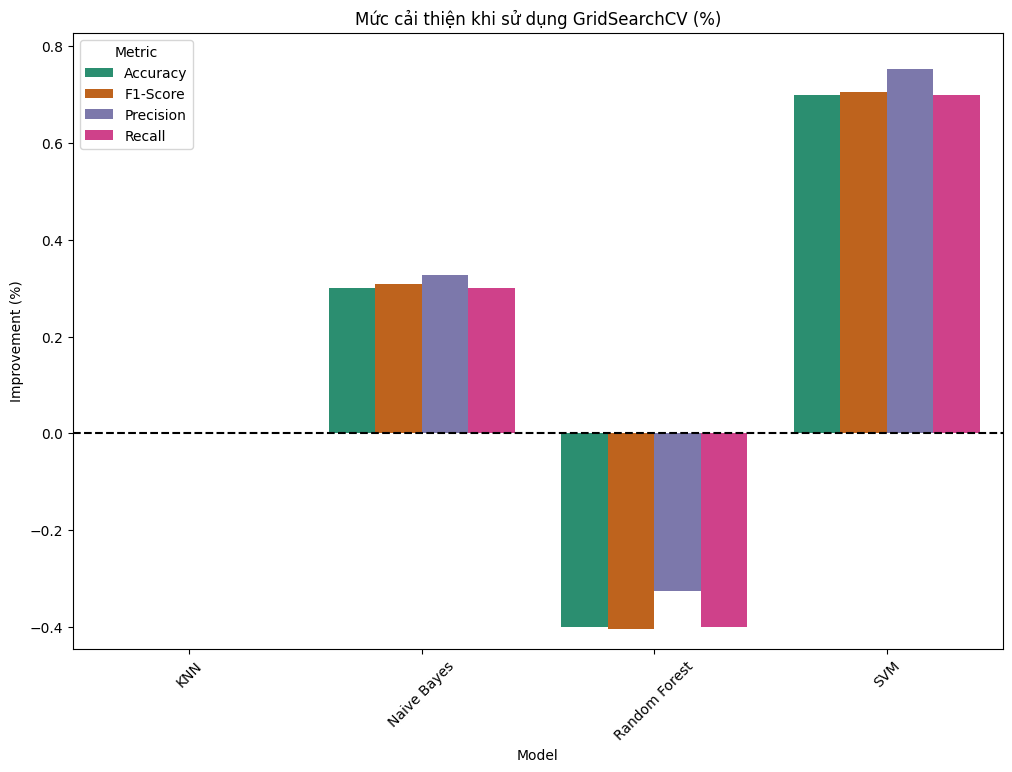

In [50]:
# Vẽ biểu đồ mức cải thiện
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_improvement, x="Model", y="Improvement (%)", hue="Metric", palette="Dark2", ax=ax)
ax.set_title("Mức cải thiện khi sử dụng GridSearchCV (%)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.axhline(0, color="black", linestyle="--")
ax.set_ylim(y_limit_min, y_limit_max)  # Giới hạn y theo max_improvement

# Lưu hình ảnh
plt.savefig(os.path.join(figures_dir, "improvement.png"))
plt.show()